# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_agg_2h_diff_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


In [4]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

test_split_threshold=0.9
target = 'target_station_load_rate' 

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())
display(data.shape)


temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                               object
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ Praça de Londres                            object
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    object
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    object
dtype: object


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                               float64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-03-31 14:00:00,0.114501,0.0,0.0,-0.320973,0.0,-18.155176,0.283739,0.188109,0.437896,0.354674,0.342591,0.146526
2023-03-31 16:00:00,-0.209918,0.0,0.0,-0.144438,0.0,18.155176,0.052694,-0.673013,-0.077037,0.039014,-0.249602,-0.188390
2023-03-31 18:00:00,-0.400753,0.0,0.0,-0.738238,0.0,0.000000,-0.636385,-0.760798,1.090686,0.315660,-0.851584,0.450043
2023-03-31 20:00:00,-0.438920,0.0,0.0,-0.593801,0.0,0.000000,0.539103,0.836041,-0.616298,-0.929247,-0.141931,0.371547
2023-03-31 22:00:00,-0.248085,0.0,0.0,-0.064195,0.0,0.000000,1.098474,-0.196470,0.000000,0.574572,-0.391533,0.151759


Timestamp('2022-01-01 14:00:00')

Timestamp('2023-03-31 22:00:00')

(5420, 12)

# Smoothing
- First differentiation removes trends (e.g., converts increasing values into stationary changes).
- Second differentiation removes linear trends (useful if first differentiation still shows patterns).
- Third differentiation is rare but can be used for very strong trends

## Smoothing 0 (no transformation)

### df_0 - Creating series for original df with time +target variable

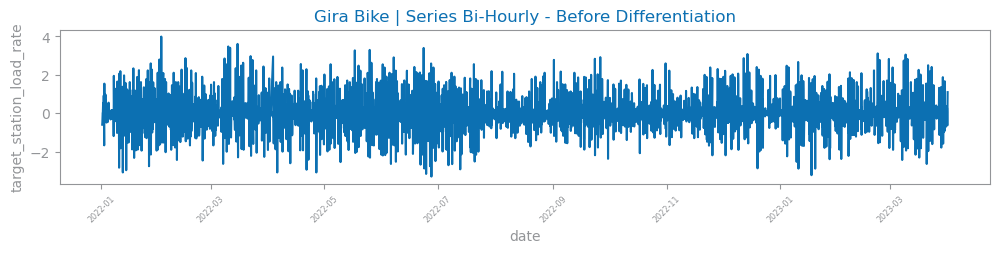

In [5]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_0 = data.copy()

df_0: DataFrame = data_0
#series - series of original df with no transformation
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Series Bi-Hourly - Before Differentiation",
)
show()

In [6]:
display(df_0.head())
display(series.head())

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2022-01-01 14:00:00,0.229002,0.0,0.000000,0.048146,0.0,0.0,-0.595851,-0.597770,-0.413569,0.283739,0.034259,-0.177924
2022-01-01 16:00:00,-0.362586,0.0,-0.059009,0.064195,0.0,0.0,-0.486409,0.673013,-1.159614,-0.865405,-0.425792,-0.303518
2022-01-01 18:00:00,-0.534338,0.0,0.059009,0.224681,0.0,0.0,-0.162136,-0.434742,0.689281,-1.014369,-0.210449,0.130827
2022-01-01 20:00:00,-0.019083,0.0,0.000000,0.192584,0.0,0.0,0.000000,0.058523,0.417623,0.443343,0.743912,0.000000
2022-01-01 22:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.497445,-0.085147,0.088669,0.156613,0.172691


date
2022-01-01 14:00:00   -0.595851
2022-01-01 16:00:00   -0.486409
2022-01-01 18:00:00   -0.162136
2022-01-01 20:00:00    0.000000
2022-01-01 22:00:00    0.000000
Name: target_station_load_rate, dtype: float64

### Evaluate

In [7]:
from pandas import Series, DataFrame

def series_train_test_split(data, trn_pct: float = 0.90):
    trn_size: int = int(len(data) * trn_pct)
    df_cp = data.copy()

    if isinstance(df_cp, Series):
        train: Series = df_cp.iloc[:trn_size]
        test: Series = df_cp.iloc[trn_size:]
    elif isinstance(df_cp, DataFrame):
        train: DataFrame = df_cp.iloc[:trn_size]
        test: DataFrame = df_cp.iloc[trn_size:]
    else:
        raise TypeError("Input must be a Series or DataFrame.")

    return train, test

def dataframe_temporal_train_test_split(data: DataFrame, trn_pct: float = 0.90) -> tuple[DataFrame, DataFrame]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: DataFrame = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

In [8]:
from math import sqrt
from matplotlib.pyplot import subplots
from pandas import Series

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    # Calculate evaluation metrics
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values and sizes of train and test sets
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"Train size: {len(trn)}")
    print(f"Test size: {len(tst)}")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    # Plot the metrics
    HEIGHT = 6
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs

In [9]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression Evaliation - No Smoothing) ###
Train size: 4878
Test size: 542
RMSE - Train: 0.7283, Test: 0.7414
MAE - Train: 0.4354, Test: 0.4389
MAPE - Train: 61527624497.4344, Test: 105766843869.9268
R2 - Train: 0.0000, Test: -0.0000



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

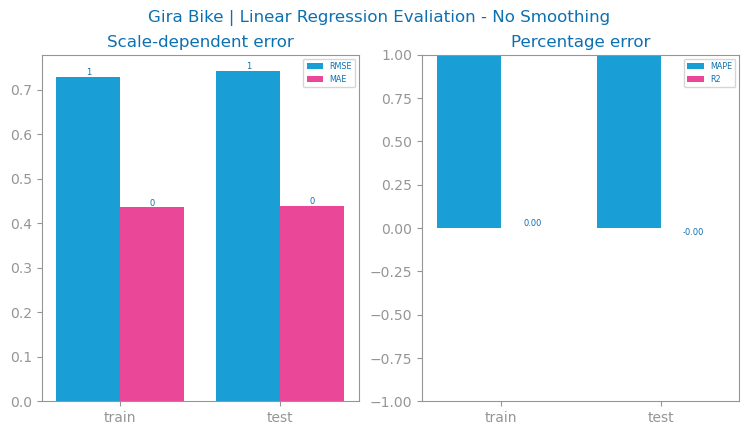

In [10]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train_0, test_0 = series_train_test_split(series, trn_pct=test_split_threshold)

trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0.to_numpy()
tstX_0 = arange(len(train_0), len(series)).reshape(-1, 1)
tstY_0 = test_0.to_numpy()

model = LinearRegression()
model.fit(trnX_0, trnY_0)

prd_trn_0: Series = Series(model.predict(trnX_0), index=train_0.index)
prd_tst_0: Series = Series(model.predict(tstX_0), index=test_0.index)

plot_forecasting_eval(train_0, test_0, prd_trn_0, prd_tst_0, title=f"{file_tag} | Linear Regression Evaliation - No Smoothing")

### Linear Regression Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

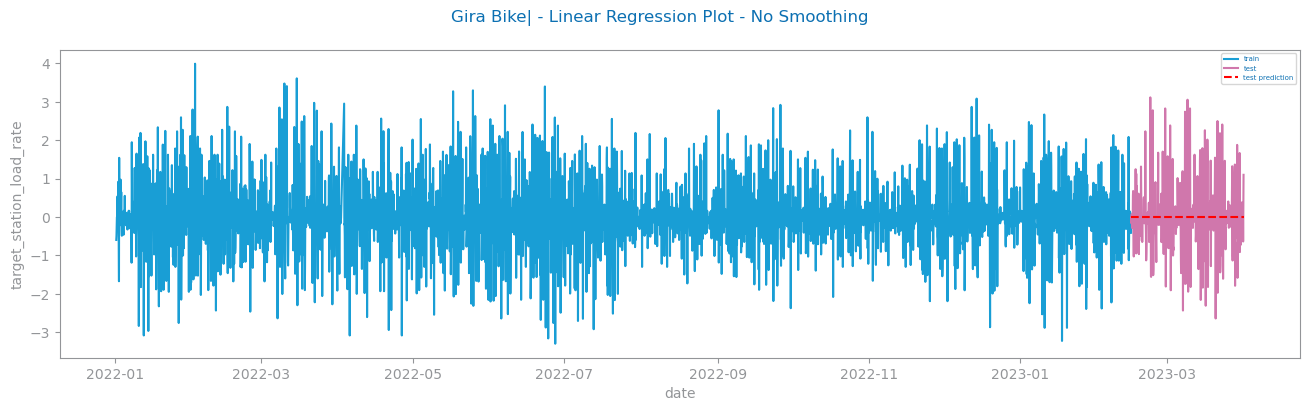

In [11]:
plot_forecasting_series(
    train_0,
    test_0,
    prd_tst_0,
    title=f"{file_tag}| - Linear Regression Plot - No Smoothing",
    xlabel="date",
    ylabel=target,
)

## Smothing Treat 1 

### Strategy Application

In [ ]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_1 = data.copy()


# Apply multiple differentiations
n_diff = 1  # Number of times to differentiate (e.g., 3 times)
df_1: DataFrame = differentiate_df(data_1,n_diff)
#series - series of original df with no transformation
series_diff_1: Series = df_1[target]

# Plot the result after differentiation
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series_diff_1.index.to_list(),
    series_diff_1.to_list(),
    title=f"{file_tag} | After {n_diff} differentiations",
    xlabel=series_diff_1.index.name,
    ylabel=target,
)
show()

In [ ]:
target = 'target_station_load_rate' 

data_1 = data.copy()

WIN_SIZE = 10

df_1: DataFrame = differentiate_df(data_1,n_diff)


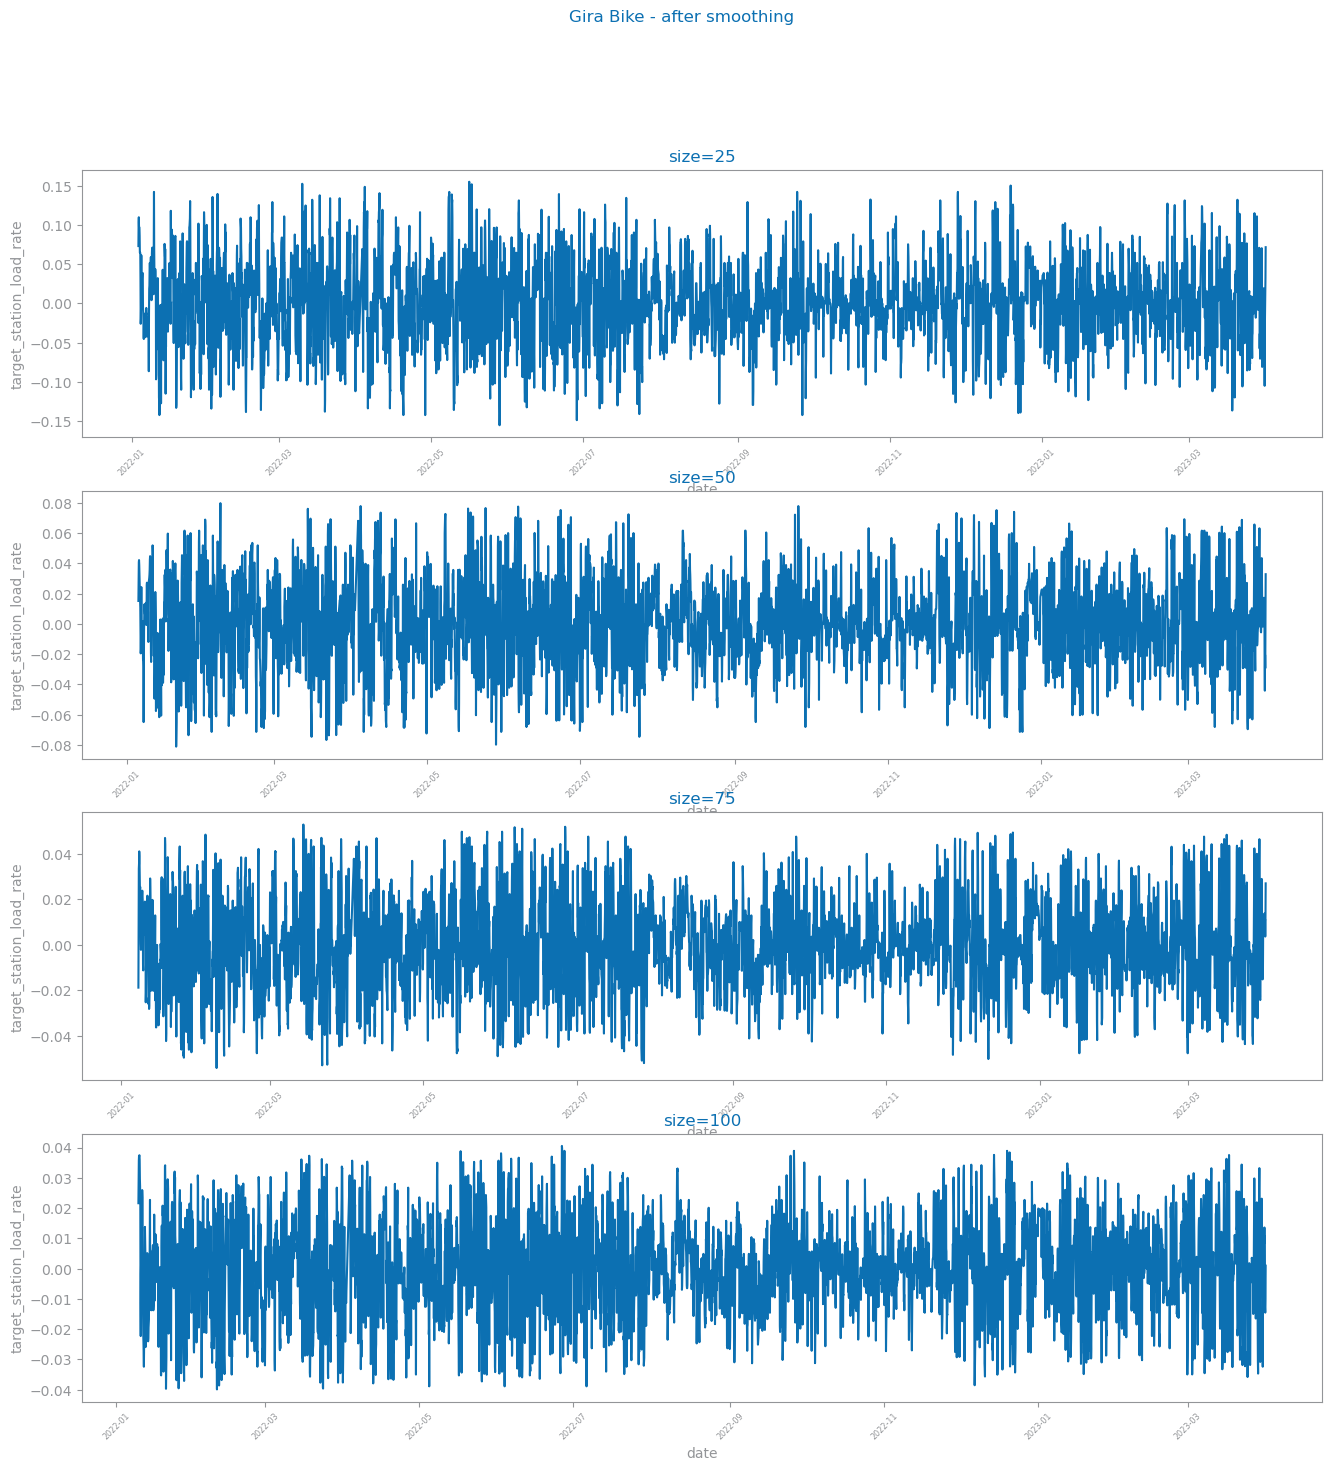

In [22]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [25, 50, 75, 100]
fig: Figure
axs: list[Axes]
HEIGHT = 8
fig, axs = subplots(len(sizes), 1, figsize=(2 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} - after smoothing")

for i in range(len(sizes)):
    ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )
show()